<a href="https://colab.research.google.com/github/Patrick-Setubal/data_science_analytics/blob/main/alura_curso/FormacaoMachineLearning/ClassificacaoSKLearn/ModelosClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeiro Projeto

In [1]:
# Importar os dados
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd 

link = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
dados = pd.read_csv(link)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [2]:
# Separar colunas x e y
x = dados[["home","how_it_works", "contact"]]
y = dados["bought"]

# Definir treino e teste
SEED = 20 
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, random_state=SEED,
                                                    stratify=y)

modelo = LinearSVC()
modelo.fit(X_train,y_train)
previsoes = modelo.predict(X_test)

accuracy = accuracy_score(y_test,previsoes)
print("Taxa de acerto: ", round(accuracy*100,2),"%")

Taxa de acerto:  96.0 %


# Segundo Projeto

## Definição do problema

Contextualizando
- Existe um site onde pode-se solicitar trabalhos de Dev
  Neste site você descreve qual trabalho deseja, informa os detalhes do projeto, e o valor que pretende pagar pelo projeto. 

- Algumas solicitações de projeto não são executadas por ter um valor baixo e uma grande carga horaria.

Objetivo
- Crie um modelo que consegue prever se o projeto será ou não executado para informar ao solicitante a chance de algum Dev executar o projeto solicitado.

Recurso
- Para isso temos o Dataset com a informação da carga horaria do projeto, valor e se foi ou não executado.

## Tratando Os dados

In [3]:
# Importando os datos
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
# Renomeando colunas
a_renomear = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'carga_horaria',
    'price': 'preco'
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,carga_horaria,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
# Alterando Não_finalizados para coluna finalizados
trocar = {0:1,
          1:0}
dados['finalizado'] = dados['nao_finalizado'].map(trocar)
dados.drop(columns='nao_finalizado', inplace=True)
dados.tail()

,carga_horaria,preco,finalizado
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1
2156,37,377,0


## Analise Exploratoria

<Axes: xlabel='carga_horaria', ylabel='preco'>

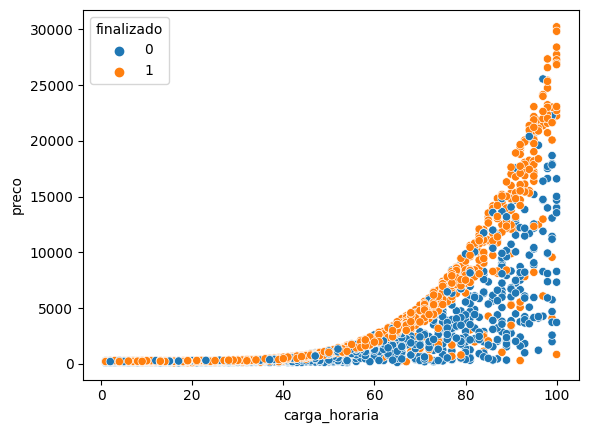

In [6]:
# Importando Biblioteca para plotar Graficos
import seaborn as sns
sns.scatterplot(x='carga_horaria', y='preco', data=dados, hue='finalizado')

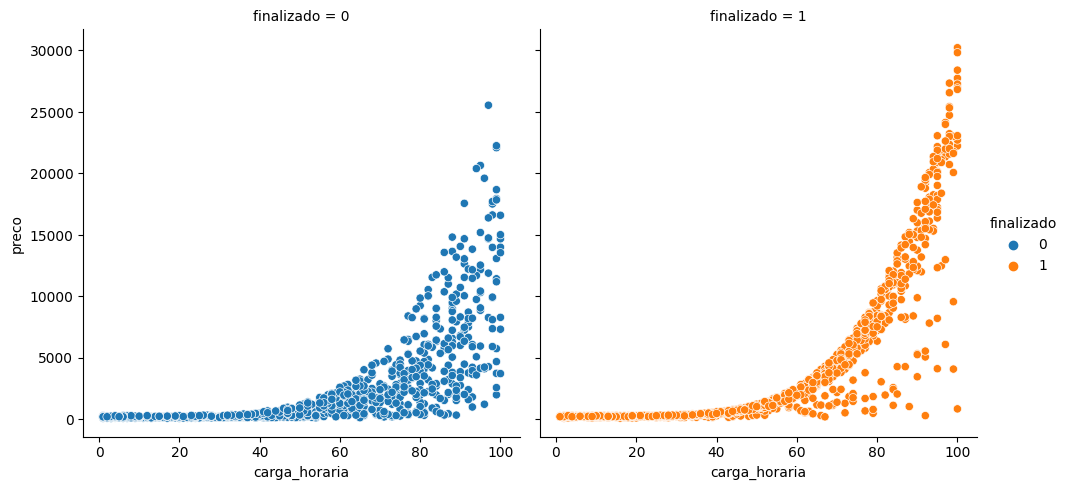

In [7]:
sns.relplot(x='carga_horaria', y='preco', data=dados, col='finalizado', hue='finalizado')

## Pre-Processamento

In [8]:
# Importando bibliotecas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Definindo forma não aleatoria para manter os valores
SEED = 5
np.random.seed(SEED) # biblioteca do sklearnSVC utiliza o random do Numpy, logo posso definir aqui

In [9]:
# Separando X e Y
x = dados[['carga_horaria','preco']]
y = dados['finalizado']

# Definindo Treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size= 0.25,
                                                        stratify= y)

## Modelo LinearSVC

In [10]:
# Rodando Modelo LinearSVC
from sklearn.svm import LinearSVC

# Definindo o Modelo
modelo = LinearSVC()

# Treinando o Modelo
modelo.fit(treino_x, treino_y)

# Testando o modelo
previsoes = modelo.predict(teste_x)

# Verificando sua acuracia
acuracia = accuracy_score(teste_y, previsoes)
print("Acuracia do Modelo é de:",round(acuracia*100, 2),"$")

Acuracia do Modelo é de: 49.26 $


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Criando BaseLine P/ Comparar

In [11]:
# Criar uma Baseline para comparar a acuracia
previsoes_de_base = np.ones(len(teste_x)) # Criar uma lista com N Numeros 1
acuracia = accuracy_score(teste_y, previsoes_de_base)
print("A Baseline é de: ",round(acuracia*100, 2),"%")

A Baseline é de:  52.59 %


### Criar uma Decision boundary

<Axes: xlabel='carga_horaria', ylabel='preco'>

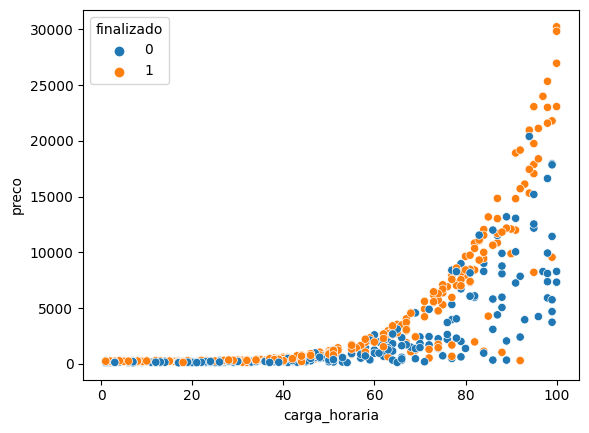

In [12]:
sns.scatterplot(x='carga_horaria', y='preco', hue=teste_y, data=teste_x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


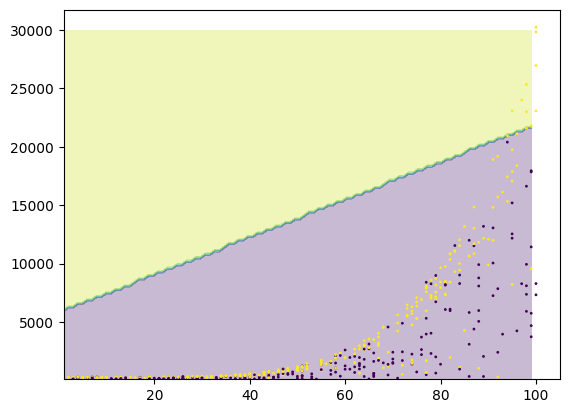

In [13]:
# Definir Limites
x_min = teste_x.carga_horaria.min()
x_max = teste_x.carga_horaria.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

# Criar eixos
pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixel)

# Criar pontos entre os valores de x e y
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# Usar modelo
z = modelo.predict(pontos)
Z = z.reshape(xx.shape)

# Plotar 
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.carga_horaria, teste_x.preco, c=teste_y, s=1)


Utilizando o algoritimo LinearSVC cria-se uma curva de descisão linear, que não seria o melhor algoritimo para o problema em questão

## Criação do Modelo SVC

In [14]:
from sklearn.svm import SVC

# Definindo o Modelo
modelo = SVC()

# Treinando o Modelo
modelo.fit(treino_x, treino_y)

# Testando o modelo
previsoes = modelo.predict(teste_x)

# Verificando sua acuracia
acuracia = accuracy_score(teste_y, previsoes)
print("Acuracia do Modelo é de:",round(acuracia*100, 2),"$")


Acuracia do Modelo é de: 55.19 $


### Normalizando os dados


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(treino_x)

treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

# Definindo o Modelo
modelo = SVC()

# Treinando o Modelo
modelo.fit(treino_x, treino_y)

# Testando o modelo
previsoes = modelo.predict(teste_x)

# Verificando sua acuracia
acuracia = accuracy_score(teste_y, previsoes)
print("Acuracia do Modelo é de:",round(acuracia*100, 2),"$")



Acuracia do Modelo é de: 66.85 $


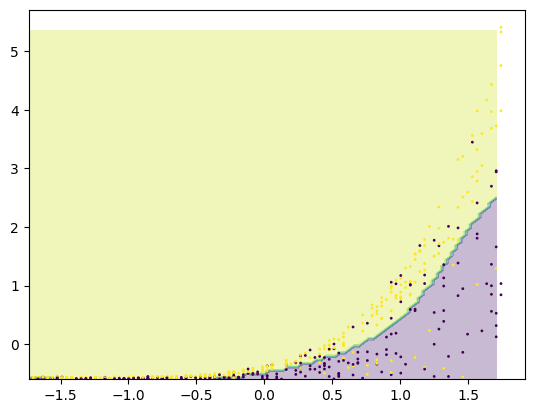

In [19]:
# Separar As colunas do np
data_x = teste_x[:,0]
data_y = teste_x[:,1]

# Definir Limites
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

# Criar eixos
pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixel)

# Criar pontos entre os valores de x e y
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# Usar modelo
z = modelo.predict(pontos)
Z = z.reshape(xx.shape)

# Plotar 
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# Terceiro Projeto

## Defindo o Problema

Temos um dataset de carros, com a informação se ele foi ou não vendido!

Features: 
- mileage_per_year: Quantas Milhas o carro percorreu por ano
- model_year: Ano
- price: Preço
- sold: Vendido 


Objetivo:
- Classificar se um carro sera ou não vendido

## Tratando os dados

In [36]:
# Importando os dados
link = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(link)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [37]:
# Renomear colunas 
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}
dados.rename(columns=a_renomear,inplace=True)

# Trocar valores da coluna Vendido
a_trocar = {'no':0, 'yes':1}
dados.vendido = dados.vendido.map(a_trocar)

# Criar coluna idade do modelo para tar valores menores e ser mais simples da gente compreender 
ano_atual = 2018
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

# Transformar milhas por kilometros 
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

# Definir colunas
dados = dados.drop(columns= ["Unnamed: 0","milhas_por_ano","ano_do_modelo"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


## Pre-processamento

In [38]:
# Definir valores de x e de y
x = dados[["preco","idade_do_modelo","km_por_ano"]]
y = dados['vendido']

# Importando bibliotecas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Definindo forma não aleatoria para manter os valores
SEED = 5
np.random.seed(SEED) # biblioteca do sklearnSVC utiliza o random do Numpy, logo posso definir aqui

## Treinando modelo 

In [40]:
# Rodando Modelo LinearSVC
from sklearn.svm import LinearSVC

# Definindo o Modelo
modelo = LinearSVC()

# Treinando o Modelo
modelo.fit(treino_x, treino_y)

# Testando o modelo
previsoes = modelo.predict(teste_x)

# Verificando sua acuracia
acuracia = accuracy_score(teste_y, previsoes)
print("Acuracia do Modelo é de:",round(acuracia*100, 2),"$")

Acuracia do Modelo é de: 56.67 $
